In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
base_2022 = pd.read_excel('/content/BASE DE DADOS PEDE 2024 - DATATHON.xlsx',sheet_name = 'PEDE2022')
base_2023 = pd.read_excel('/content/BASE DE DADOS PEDE 2024 - DATATHON.xlsx',sheet_name = 'PEDE2023')
base_2024 = pd.read_excel('/content/BASE DE DADOS PEDE 2024 - DATATHON.xlsx',sheet_name = 'PEDE2024')

In [14]:
base_2022.head(2)

,RA,Fase,Turma,Nome,Ano nasc,Idade 22,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,...,Inglês,Indicado,Atingiu PV,IPV,IAN,Fase ideal,Defas,Destaque IEG,Destaque IDA,Destaque IPV
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,...,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,...,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...


In [15]:
base_2023.head(2)

,RA,Fase,INDE 2023,Pedra 2023,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,...,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1
0,RA-861,ALFA,9.31095,Topázio,ALFA A - G0/G1,Aluno-861,6/17/2015,8,Feminino,2023,...,NaN,NaN,8.920,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
1,RA-862,ALFA,8.22120,Topázio,ALFA A - G0/G1,Aluno-862,5/31/2014,9,Masculino,2023,...,NaN,NaN,8.585,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN


In [16]:
base_2024.head(2)

,RA,Fase,INDE 2024,Pedra 2024,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,...,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Escola,Ativo/ Inativo,Ativo/ Inativo.1
0,RA-1275,ALFA,7.611367,Ametista,ALFA A - G0/G1,Aluno-1275,2016-07-28,8,Masculino,2024,...,5.446667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
1,RA-1276,ALFA,8.002867,Topázio,ALFA A - G0/G1,Aluno-1276,2016-10-16,8,Feminino,2024,...,7.050000,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando


# Tratamento dos dados

---


In [17]:
# Ajuste do nome das colunas
base_2022 = base_2022.rename(columns={'Ano ingresso':'Ano_ingresso'})
base_2023 = base_2023.rename(columns={'Ano ingresso':'Ano_ingresso'})
base_2024 = base_2024.rename(columns={'Ano ingresso':'Ano_ingresso'})


In [24]:
# Selecão das coluna

df_22 = base_2022[['RA','Ano_ingresso','IAN','IDA','IPV','IEG']]
df_23 = base_2023[['RA','Ano_ingresso','IAN','IDA','IPV','IEG']]
df_24 = base_2024[['RA','Ano_ingresso','IAN','IDA','IPV','IEG']]

In [26]:
# União das base

df = pd.concat([df_22, df_22, df_22], ignore_index=True)

# Analise exploratoria

---


In [27]:
df.describe()

,Ano_ingresso,IAN,IDA,IPV,IEG
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,2020.496512,6.424419,6.092907,7.253642,7.891163
std,1.789523,2.388682,2.045415,1.092958,1.637705
min,2016.000000,2.500000,0.000000,2.500000,0.000000
25%,2019.000000,5.000000,4.800000,6.722000,7.000000
50%,2021.000000,5.000000,6.300000,7.333000,8.300000
75%,2022.000000,10.000000,7.600000,7.917000,9.100000
max,2022.000000,10.000000,9.900000,10.000000,10.000000


In [28]:
agg_df_mean = df.groupby(['Ano_ingresso'])[['IAN','IDA','IPV','IEG']].mean()
agg_df_median = df.groupby(['Ano_ingresso'])[['IAN','IDA','IPV','IEG']].median()

# Perguntas do Datathon



---



### 1. Adequação do nível (IAN): Qual é o perfil geral de defasagem dos alunos (IAN) e como ele evolui ao longo do ano?

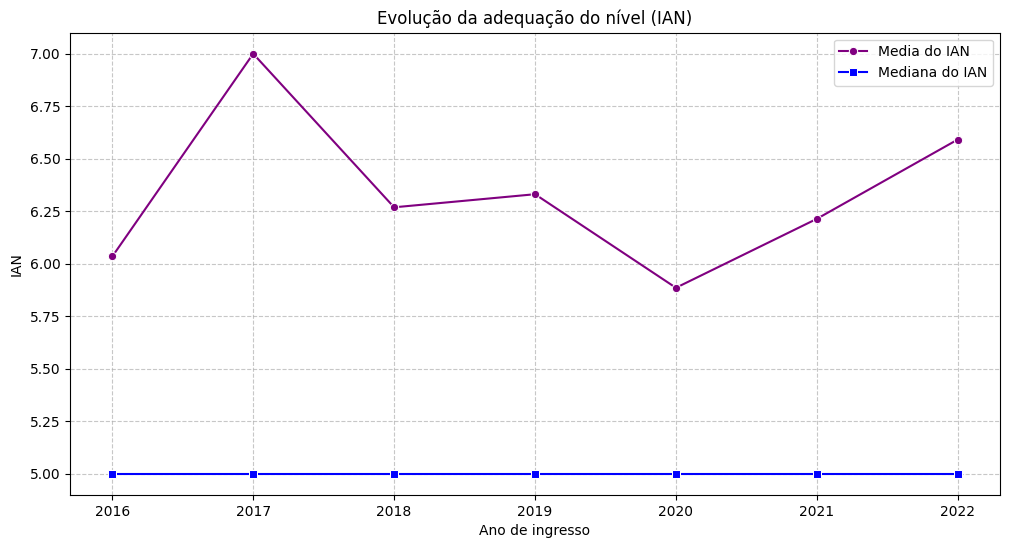

In [29]:
# Criando o gráfico
plt.figure(figsize=(12, 6))

sns.lineplot(data=agg_df_mean, x=agg_df_mean.index, y='IAN', color='purple', marker='o', label='Media do IAN')
sns.lineplot(data=agg_df_median, x=agg_df_median.index, y='IAN', color='blue', marker='s', label='Mediana do IAN')

# Tickets
plt.xlabel("Ano de ingresso")
plt.ylabel("IAN")
plt.title("Evolução da adequação do nível (IAN)")
plt.grid(linestyle='--', alpha=0.7)
# plt.xticks(rotation=45)
plt.legend()

plt.show()

### 2. Desempenho acadêmico (IDA): O desempenho acadêmico médio (IDA) está melhorando, estagnado ou caindo ao longo das fases e anos?

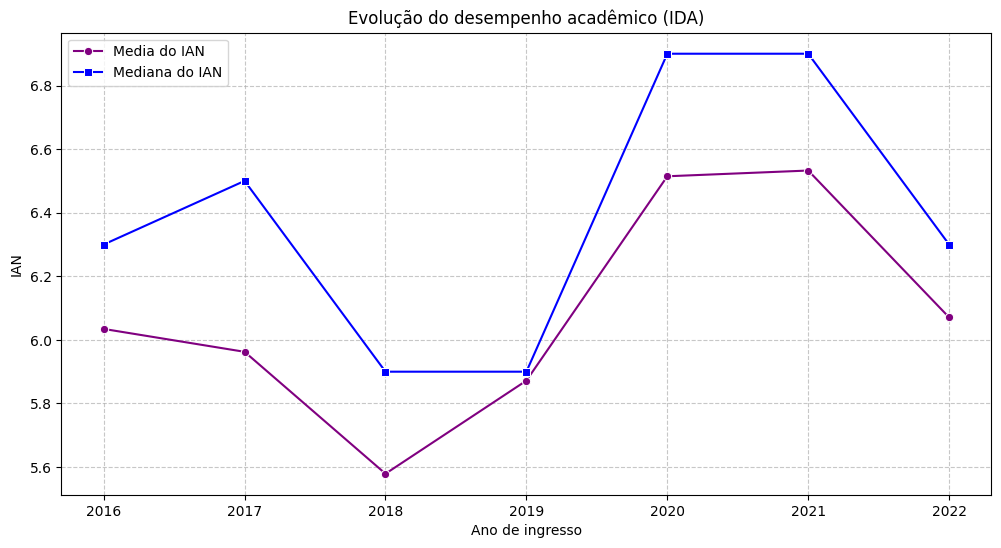

In [30]:
# Criando o gráfico
plt.figure(figsize=(12, 6))

sns.lineplot(data=agg_df_mean, x=agg_df_mean.index, y='IDA', color='purple', marker='o', label='Media do IAN')
sns.lineplot(data=agg_df_median, x=agg_df_median.index, y='IDA', color='blue', marker='s', label='Mediana do IAN')

# Tickets
plt.xlabel("Ano de ingresso")
plt.ylabel("IAN")
plt.title("Evolução do desempenho acadêmico (IDA)")
plt.grid(linestyle='--', alpha=0.7)
# plt.xticks(rotation=45)
plt.legend()

plt.show()

### 3.Engajamento nas atividades (IEG): O grau de engajamento dos alunos (IEG) tem relação direta com seus indicadores de desempenho (IDA) e do ponto de virada (IPV)?

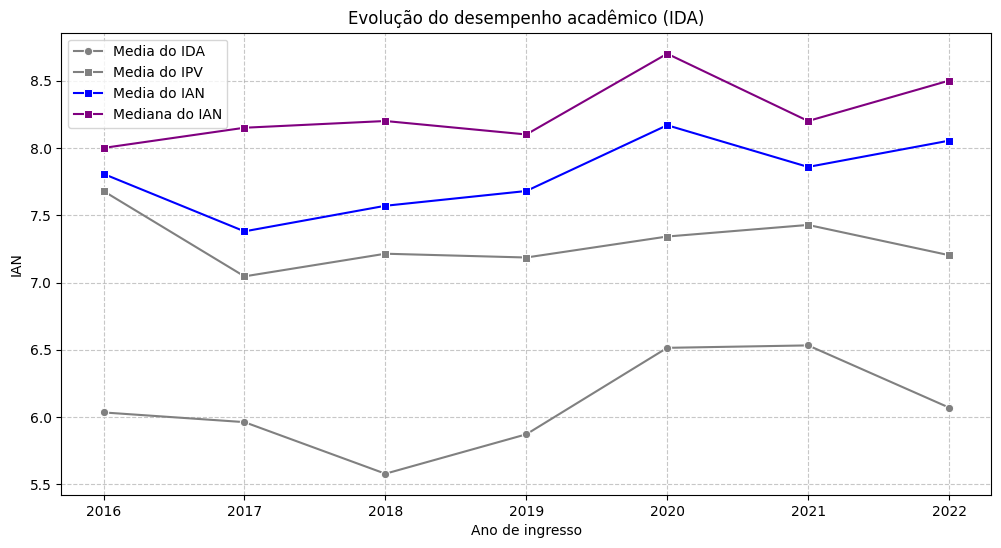

In [34]:
# Criando o gráfico
plt.figure(figsize=(12, 6))

sns.lineplot(data=agg_df_mean, x=agg_df_mean.index, y='IDA', color='gray', marker='o', label='Media do IDA')
sns.lineplot(data=agg_df_mean, x=agg_df_mean.index, y='IPV', color='gray', marker='s', label='Media do IPV')
sns.lineplot(data=agg_df_mean, x=agg_df_mean.index, y='IEG', color='blue', marker='s', label='Media do IAN')
sns.lineplot(data=agg_df_median, x=agg_df_median.index, y='IEG', color='purple', marker='s', label='Mediana do IAN')



# Tickets
plt.xlabel("Ano de ingresso")
plt.ylabel("IAN")
plt.title("Evolução do desempenho acadêmico (IDA)")
plt.grid(linestyle='--', alpha=0.7)
# plt.xticks(rotation=45)
plt.legend()

plt.show()

### 4. Autoavaliação (IAA): As percepções dos alunos sobre si mesmos (IAA) são coerentes com seu desempenho real (IDA) e engajamento (IEG)?

### 5. Aspectos psicossociais (IPS): Há padrões psicossociais (IPS) que antecedem quedas de desempenho acadêmico ou de engajamento?

### 6. Aspectos psicopedagógicos (IPP): As avaliações psicopedagógicas (IPP) confirmam ou contradizem a defasagem identificada pelo IAN?


### 7. Ponto de virada (IPV): Quais comportamentos - acadêmicos, emocionais ou de engajamento - mais influenciam o IPV ao longo do tempo?

### 8. Multidimensionalidade dos indicadores: Quais combinações de indicadores (IDA + IEG + IPS + IPP) elevam mais a nota global do aluno (INDE)?

### 9. Previsão de risco com Machine Learning: Quais padrões nos indicadores permitem identificar alunos em risco antes de queda no desempenho ou aumento da defasagem? Construa um modelo preditivo que mostre uma probabilidade do aluno ou aluna entrar em risco de defasagem.

### 10. Efetividade do programa: Os indicadores mostram melhora consistente ao longo do ciclo nas diferentes fases (Quartzo, Ágata, Ametista e Topázio), confirmando o impacto real do programa?

### 11. Insights e criatividade: Você pode adicionar mais insights e pontos de vista não abordados nas perguntas, utilize a criatividade e a análise dos dados para trazer sugestões para a Passos Mágicos